In [6]:
%cd D:\IIIT\LAB_SE\ADR\LLM4ADR\RD_experiments
%pwd

D:\IIIT\LAB_SE\ADR\LLM4ADR\RD_experiments


'D:\\IIIT\\LAB_SE\\ADR\\LLM4ADR\\RD_experiments'

In [9]:
import os
from dotenv import load_dotenv
path = 'D:\IIIT\LAB_SE\ADR\LLM4ADR\RD_experiments'
load_dotenv(os.path.join(path, '.env'))
openai_key = os.getenv('openai_key_karthik')

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read JSONL file into a DataFrame
df = pd.read_json('data/old_data.jsonl', lines=True)

# Split the DataFrame into train and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_json('data/old_data_train.jsonl', orient='records', lines=True)
test_df.to_json('data/old_data_test.jsonl', orient='records', lines=True)

In [7]:
import pandas as pd

train_df = pd.read_json('data/old_data_train.jsonl', lines=True)
test_df = pd.read_json('data/old_data_test.jsonl', lines=True)

In [6]:
from openai import OpenAI
client = OpenAI(api_key = openai_key)

fileObject = client.files.create(
                    file=open("data/old_data_train.jsonl", "rb"),
                    purpose="fine-tune"
            )

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [40]:
fineTuningJob = client.fine_tuning.jobs.create(
                    training_file=fileObject.id, 
                    model="babbage-002",
                    hyperparameters={
                        "n_epochs": 1
                    },
                    suffix="firsttraining2"
                    
                )

In [14]:

from openai import OpenAI
client = OpenAI(api_key = openai_key)

def answer(prompt):
    response = client.completions.create(
        model="ft:babbage-002:personal:firsttraining1:9O5Gl7Ic",
        prompt=prompt,
        temperature=0.5,
        max_tokens=256,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )

    print(response.choices[0].text)

In [15]:
answer(test_df['prompt'][0])

NotFoundError: Error code: 404 - {'error': {'message': 'The model `ft:babbage-002:personal:firsttraining1:9O5Gl7Ic` does not exist or you do not have access to it.', 'type': 'invalid_request_error', 'param': None, 'code': 'model_not_found'}}

In [50]:

# print(client.fine_tuning.jobs.list(limit=10))

# Retrieve the state of a fine-tune
# client.fine_tuning.jobs.retrieve(fineTuningJob.id)

# Cancel a job
# client.fine_tuning.jobs.cancel("ftjob-abc123")

# # List up to 10 events from a fine-tuning job
# print(client.fine_tuning.jobs.list_events(fine_tuning_job_id=fineTuningJob.id, limit=10))

# # Delete a fine-tuned model (must be an owner of the org the model was created in)
# client.models.delete("ft:gpt-3.5-turbo:acemeco:suffix:abc123")

SyncCursorPage[FineTuningJobEvent](data=[FineTuningJobEvent(id='ftevent-visyFxLJIK0106T8ozfbdFrJ', created_at=1715527900, level='info', message='The job has successfully completed', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-4B0BZcGgoYTTOG5VQZ3FfG17', created_at=1715527897, level='info', message='New fine-tuned model created: ft:babbage-002:personal:firsttraining2:9O5Sjrhu', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-76CkJjKxGzQA8EBhEJyUVtYb', created_at=1715527892, level='info', message='Step 76/76: training loss=2.99', object='fine_tuning.job.event', data={'step': 76, 'train_loss': 2.988022804260254, 'total_steps': 76, 'train_mean_token_accuracy': 0.3828125}, type='metrics'), FineTuningJobEvent(id='ftevent-lmL7pM5IcZwGxf8LrjHovXjo', created_at=1715527880, level='info', message='Step 75/76: training loss=2.84', object='fine_tuning.job.event', data={'step': 75, 'train_loss': 2.8404130935668945, 

## Gemini

In [12]:
import pandas as pd

In [53]:
df_train = pd.read_json('data/old_data_train.jsonl', lines=True)
df_train = df_train[df_train['completion'].str.len() < 5000]
df_train.to_csv('data/old_data_5000_train.csv', index=False)
df_train.rename(columns={'prompt': 'text_input', 'completion': 'output'}, inplace=True)
train_list = df_train.to_dict(orient='records')

df_test = pd.read_json('data/old_data_test.jsonl', lines=True)
df_test = df_test[df_test['completion'].str.len() < 5000]
df_test.to_csv('data/old_data_5000_train.csv', index=False)
df_test.rename(columns={'prompt': 'text_input', 'completion': 'output'}, inplace=True)
test_list = df_test.to_dict(orient='records')

In [62]:
test_list[0]['text_input']

'The following code samples were executed with cabal repl plutus-ledger on the plutus-apps commit hash 172873e87789d8aac623e014eff9a39364c719ae.\n\nCurrently, the plutus-ledger-constraint library has the MustValidateIn constraint which\n\n    validates that a given POSIXTimeRange` contains the TxInfo’s validity range\n\n    creates a transaction with the provided POSIXTimeRange\n\nThe implementation of 1) is trivial. However, a major issue arises for the implementation of 2). Setting the validity interval of a Cardano transaction is done by specifing the slot of the lower bound and the slot of the upper bound. Therefore, the MustValidateIn constraint needs to convert the provided POSIXTimeRange to essentially a (Maybe Slot, Maybe Slot). The problem is that there are many ways to convert a POSIXTime to a Slot.\n\nCurrently, provided a POSIXTimeRange, plutus-contract does the following:\n\n    convert the time range to a slot range with Ledger.TimeSlot.posixTimeRangeToContainedSlotRange 

In [55]:
# Importing the generativeai module from the google package.
import google.generativeai as genai

# Configuring the generativeai module to use gRPC (Google Remote Procedure Call) as the transport protocol.
genai.configure(transport='grpc')


In [56]:
for i, m in zip(range(5), genai.list_tuned_models()):
    print(m)

TunedModel(name='tunedModels/olddata5000-rsv5huc01tsi',
           source_model='models/gemini-1.0-pro-001',
           base_model='models/gemini-1.0-pro-001',
           display_name='old_data_5000',
           description='{"description":"","exampleInput":"","exampleOutput":"","II":"https://drive.google.com/open?id=1KAlWd6Gw5VcsvojWbncrv384ioBFpcZAXuPTYEN3PcM&authuser=0","showedTuningComplete":false,"rowsCount":92}',
           temperature=0.9,
           top_p=1.0,
           top_k=0,
           state=<State.ACTIVE: 2>,
           create_time=datetime.datetime(2024, 5, 19, 10, 15, 40, 834652, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 5, 19, 10, 16, 4, 36984, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 5, 19, 10, 15, 41, 895067, tzinfo=datetime.timezone.utc),
                                  complete_time=datetime.datetime(2024, 5, 19, 10, 16, 4, 36984, tzinfo=datetime.timezone.utc),
        

In [59]:
# Assigning a name to the fine-tuned model.
my_finetuned_model_name = "adrinetuned2"

# Creating a tuned model operation with specified parameters.
operation = genai.create_tuned_model(
    source_model= 'models/gemini-1.0-pro-001',
    training_data = train_list,
    id = my_finetuned_model_name,
    epoch_count = 2,
    batch_size=4,
    learning_rate=0.001,
)

<AxesSubplot:xlabel='epoch', ylabel='mean_loss'>

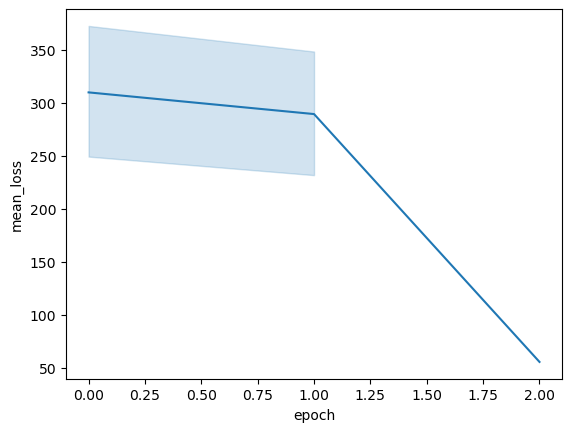

In [63]:
import seaborn as sns

model = operation.result()
model.state
snapshots = pd.DataFrame(model.tuning_task.snapshots)
sns.lineplot(data=snapshots, x='epoch', y='mean_loss')

In [65]:
model = genai.GenerativeModel(model_name=f'tunedModels/{my_finetuned_model_name}')
result = model.generate_content(test_list[0]['text_input'])
print(result.text)

Context = "## Context We need to decide on which database management system (DBMS) to use for Project X. The database will be used to store and manage large amounts of data from multiple sources. We need a DBMS that can handle transactions, offer scalability, and provide high reliability and security. Among various options available, we are considering MySQL as a possible choice.\n### Decision Considerations\n- Ease of use and maintenance\n- Community support and resources\n- Performance and scalability\n- Security and reliability\n- Cost and licensing\n- Compatibility with our technology stack\n### Considered Options\n- MySQL\n- PostgreSQL\n- Oracle\n- Microsoft SQL Server\n- MongoDB\n"
result = model.generate_content(Context)
print(result.text)

The MustValidateIn constraint is removed from the plutus-ledger-constraint library.
After careful evaluation and discussion, we have decided to use MySQL as the DBMS for Project X.
